# Apple Stock Analysis

![](https://d1iqudb2hg8ayl.cloudfront.net/storage/uploads/images/news/1677228091067.jpg)

---

Apple Inc. is an American multinational technology company that specializes in consumer electronics, computer software, and online services. Apple is the world's largest technology company by revenue and, since January 2021, the world's most valuable company. 

# Dataset Description

Was taken from https://www.kaggle.com/datasets/varpit94/apple-stock-data-updated-till-22jun2021. This dataset provides historical data of APPLE INC. stock (AAPL). The data is available at a daily level. Currency is USD. Originally this dataset contain 6 features and 10409 record overall, which the price stock was started from 12 December 1980 until 24 March 2020. The 6 feature that we take namely:
<br>
- Open: The price at which the stock first trades when the market opens on a given day. This represents the initial price at which the stock is traded that day.
- Low: The lowest price reached by the stock during the trading session on a given day. This reflects the lowest level the stock's price fell to throughout the day.
- High: The highest price reached by the stock during the trading session on that day, showing the peak price the stock achieved during the day.
- Close: The last price at which the stock is traded before the market closes for the day. This is the price most commonly used as a daily reference for the stock.
- Adj Close (Adjusted Close): The closing price adjusted to reflect factors such as dividends, stock splits, or other corporate actions. This provides a more accurate view of the stock's real value, particularly useful for long-term analysis.

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, skew, kurtosis, ttest_1samp
import warnings
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)

In [6]:
df_stock = pd.read_csv('..\\dataset\\AAPL.csv')

In [7]:
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10409 entries, 0 to 10408
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10409 non-null  object 
 1   Open       10409 non-null  float64
 2   High       10409 non-null  float64
 3   Low        10409 non-null  float64
 4   Close      10409 non-null  float64
 5   Adj Close  10409 non-null  float64
 6   Volume     10409 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 569.4+ KB


In [8]:
# Let's see how many shares of the Apple inc in early 1980s
df_stock.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100323,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095089,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088110,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090291,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092908,73449600


In [9]:
# Then how many shares of the Apple inc the end of 2022s?
df_stock.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
10404,2022-03-18,160.509995,164.479996,159.759995,163.979996,163.979996,123351200
10405,2022-03-21,163.509995,166.350006,163.009995,165.380005,165.380005,95811400
10406,2022-03-22,165.509995,169.419998,164.910004,168.820007,168.820007,81532000
10407,2022-03-23,167.990005,172.639999,167.649994,170.210007,170.210007,98062700
10408,2022-03-24,171.059998,174.139999,170.210007,174.070007,174.070007,90018700


Such a significant increase!

In [10]:
df_stock['Date'] = pd.to_datetime(df_stock['Date'], format=r'%Y-%m-%d')

To make it clearer let's see this line plot

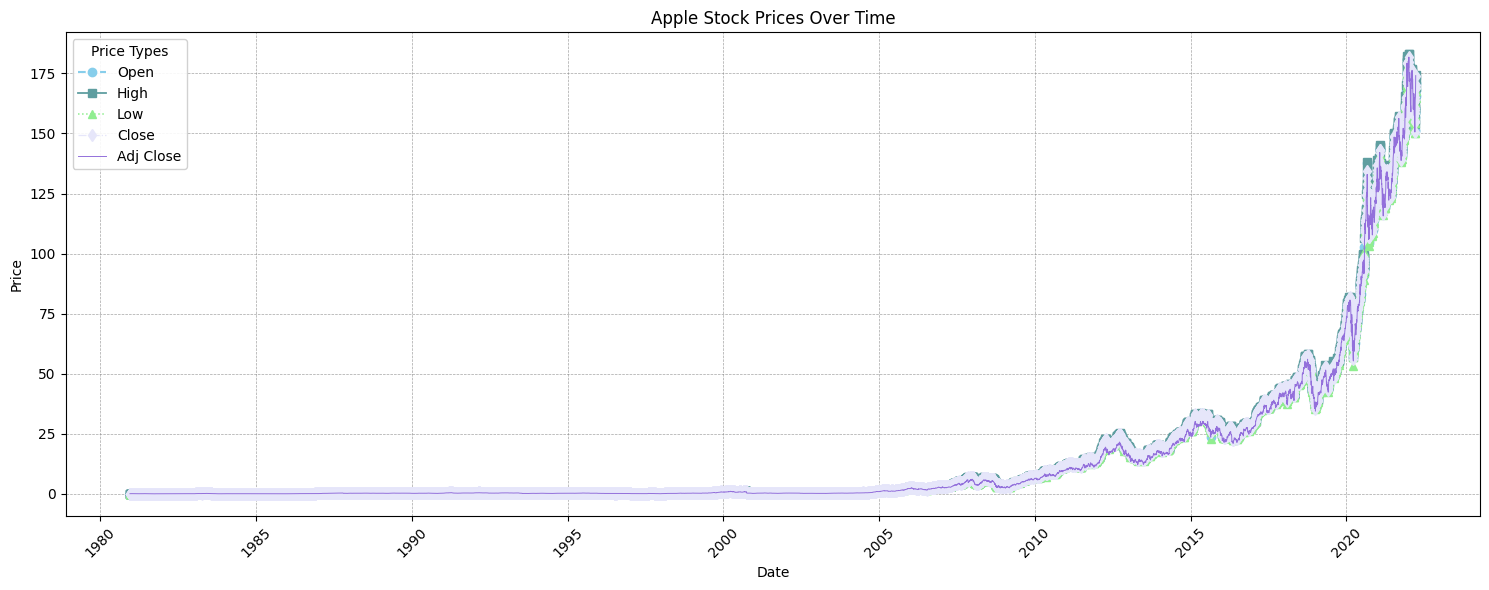

In [11]:
plt.figure(figsize=(15, 6))
plt.plot(df_stock['Date'], df_stock['Open'], label='Open', linestyle='--', marker='o', linewidth=1.5, markersize=6, color='skyblue')
plt.plot(df_stock['Date'], df_stock['High'], label='High', linestyle='-', marker='s', linewidth=1.3, markersize=6, color='cadetblue')
plt.plot(df_stock['Date'], df_stock['Low'], label='Low', linestyle=':', marker='^', linewidth=1.1, markersize=6, color='lightgreen')
plt.plot(df_stock['Date'], df_stock['Close'], label='Close', linestyle='-.', marker='d', linewidth=0.9, markersize=6, color='lavender')
plt.plot(df_stock['Date'], df_stock['Adj Close'], label='Adj Close', linestyle='-', linewidth=0.7, markersize=6, color='mediumpurple')

plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
plt.legend(loc='upper left', fontsize=10, frameon=True, framealpha=0.9, title="Price Types")

plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Apple Stock Prices Over Time")
plt.tight_layout()
plt.show()

It can be seen that Apple Inc.'s stock price increased significantly in 2020.

Now let's deep dive into the distribution analysis

# Number of Days the Stock Price Rises or Falls

In [12]:
"""
To find out this, we can use discrete probability distribution
let's start with Open Price feature
"""
df_copy = df_stock.copy()
df_copy['open_diff'] = df_copy['Open'].diff()

df_copy['open_status'] = df_copy['open_diff'].apply(lambda x: 'Rise' if x > 0 else ('Falls' if x < 0 else 'Settled'))

status_counts = df_copy['open_status'].value_counts()

status_probabilities = status_counts / len(df_copy)

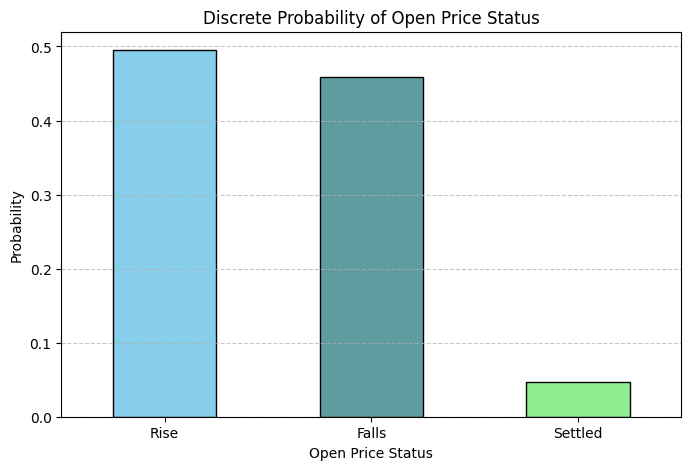

In [13]:
# Create the plot
plt.figure(figsize=(8, 5))
status_probabilities.plot(kind='bar', color=['skyblue', 'cadetblue', 'lightgreen'], edgecolor='black')

# Adjust the title & label
plt.title("Discrete Probability of Open Price Status")
plt.xlabel("Open Price Status")
plt.ylabel("Probability")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Daily Return

Daily return is a financial metric used to measure the percentage change in the value of an asset, such as a stock, from one day to the next. It helps investors assess how much the price of a stock or other asset has increased or decreased on a daily basis.

First we have to calculate the percentage change :<br><br>
$ percentage\:change = \frac{current\:price \:-\: previous\:price}{previous\:price}\times 100$

In [14]:
# Calculate the percentage change (we use default periods, periods=1)

# We use close price
df_copy['daily_return'] = df_copy['Close'].pct_change()
# drop NaN as a result of pct calculation
daily_returns = df_copy['daily_return'].dropna()

mean_return = daily_returns.mean()
std_return = daily_returns.std()

Then compare it with normal distribution

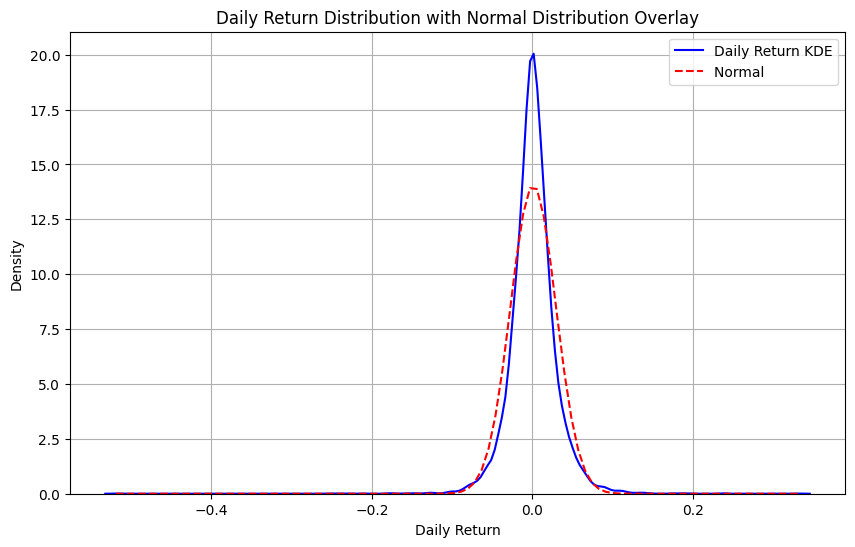

In [15]:
plt.figure(figsize=(10, 6))
sns.kdeplot(daily_returns, color='blue', label='Daily Return KDE')
x = np.linspace(daily_returns.min(), daily_returns.max(), 100)
plt.plot(x, norm.pdf(x, mean_return, std_return), color='red', linestyle='--', label='Normal ')

plt.title("Daily Return Distribution with Normal Distribution Overlay")
plt.xlabel("Daily Return")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

Findings :
- Higher Peak (Leptokurtic Distribution): The blue KDE curve has a much higher and narrower peak than the red Normal curve. This indicates that the daily returns distribution has leptokurtosis, meaning it is more peaked around the mean compared to a Normal distribution.

- Fat Tails: While not very prominent here, leptokurtic distributions generally have slightly fatter tails, implying a higher probability of extreme values (large positive or negative returns) than a Normal distribution would predict.

- Mean-Centered: Both distributions are centered around zero, indicating that, on average, there isn’t a significant directional bias in the returns (no strong upward or downward trend).

From visualization above we can conclude : 
- Because there are more extreme values, the stock might have a higher probability of experiencing sudden, large price movements.
- It's suggests that daily returns might not be well-represented by a Normal distribution and could instead be modeled by a distribution that accommodates higher kurtosis, such as the t-distribution, which could better capture the risk of extreme price movements.

# Joint Distribution

In [16]:
df_2020 = df_copy[df_copy['Date'].dt.year == 2020]

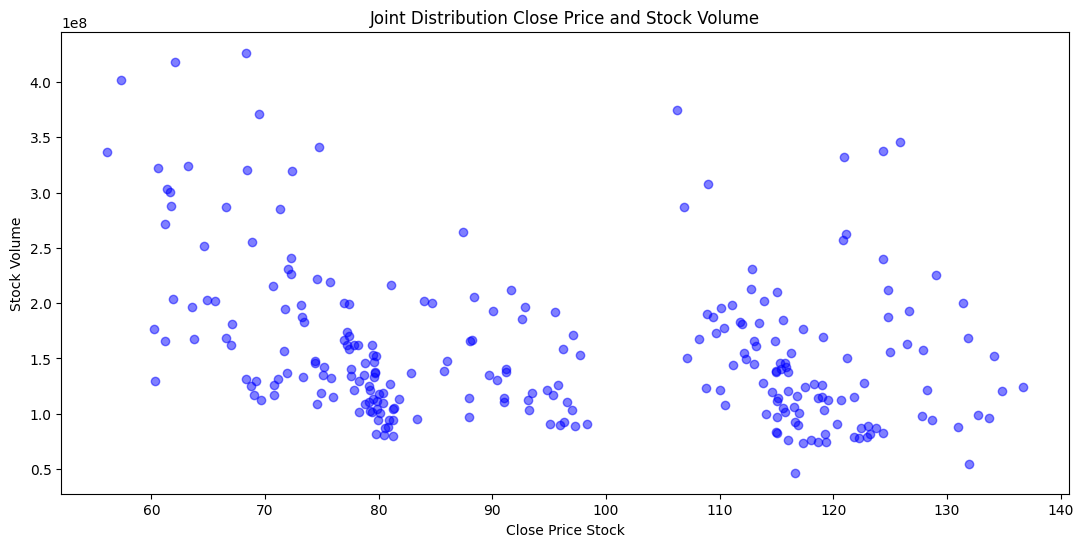

<Figure size 1300x600 with 0 Axes>

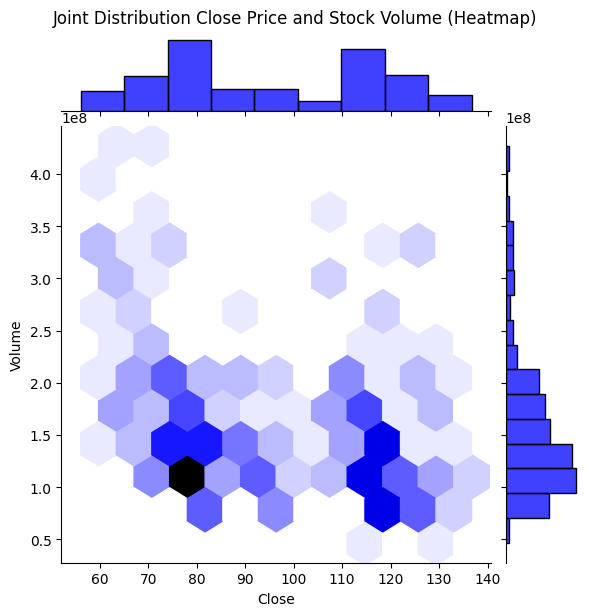

In [17]:
# Scatter plot between two feature
plt.figure(figsize=(13, 6))
plt.scatter(df_2020['Close'], df_2020['Volume'], alpha=0.5, color='blue')
plt.title('Joint Distribution Close Price and Stock Volume')
plt.xlabel('Close Price Stock')
plt.ylabel('Stock Volume')
plt.show()

# visualize with jointplot
plt.figure(figsize=(13, 6))
sns.jointplot(x='Close', y='Volume', data=df_2020, kind='hex', color='blue')
plt.suptitle('Joint Distribution Close Price and Stock Volume (Heatmap)', y=1.02)
plt.show()

# Expected Value

In [18]:
# calculate expected daily return
expected_daily_return = mean_return

# Calculate expected price on the next day
current_price = df_copy['Close'].iloc[-1]  # Close price last index day
expected_price_tomorrow = current_price * (1 + expected_daily_return)

print(f"Exoected Value Daily Return: {expected_daily_return:.4f}")
print(f"Expected Close Price Tomorrow: {expected_price_tomorrow:.2f}")

Exoected Value Daily Return: 0.0011
Expected Close Price Tomorrow: 174.26


# Transformation

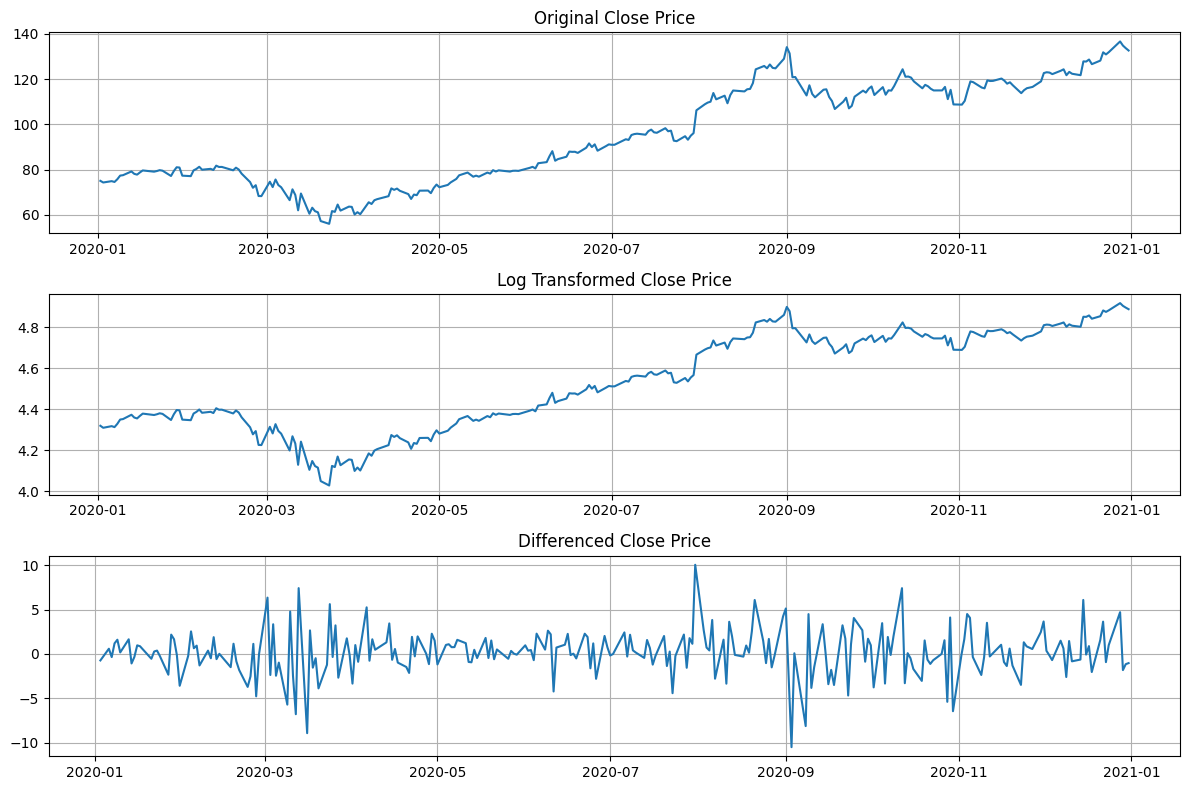

In [19]:
# Log Transformation
df_2020['Log Close Price'] = np.log(df_2020['Close'])

# 2. Differencing
df_2020['Differenced Close Price'] = df_2020['Close'].diff()

# Plot Original, Log-Transformed, and Differenced Close Price
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(df_2020['Date'], df_2020['Close'])
plt.title('Original Close Price')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(df_2020['Date'], df_2020['Log Close Price'])
plt.title('Log Transformed Close Price')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(df_2020['Date'], df_2020['Differenced Close Price'])
plt.title('Differenced Close Price')
plt.grid(True)

plt.tight_layout()
plt.show()

# Parameter Interpretation

Mean Daily Return: 0.0011
Variance of Daily Return: 0.0008
Standard Deviation of Daily Return: 0.0284
Skewness of Daily Return: -0.3788
Kurtosis of Daily Return: 18.1199


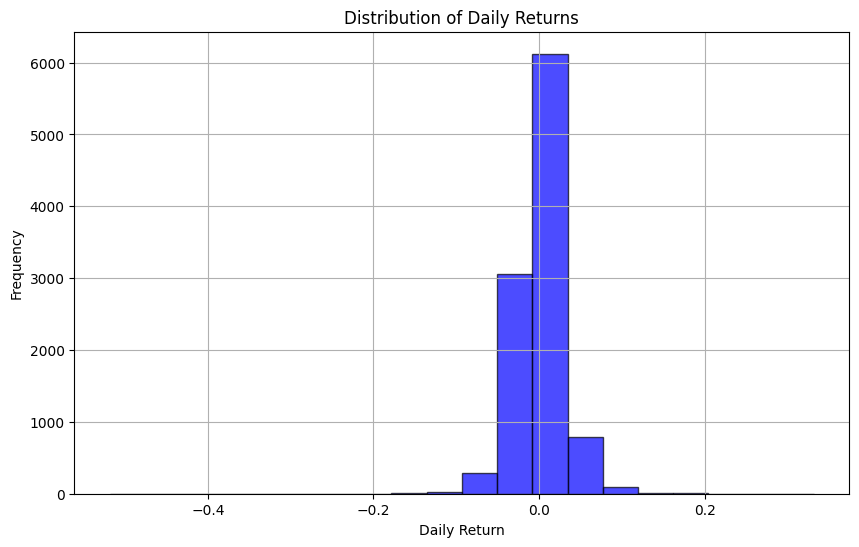

In [20]:
# Menghitung parameter distribusi
mean_return = df_copy['daily_return'].mean()
variance_return = df_copy['daily_return'].var()
std_dev_return = df_copy['daily_return'].std()
skewness_return = skew(df_copy['daily_return'].dropna())
kurtosis_return = kurtosis(df_copy['daily_return'].dropna())

# Menampilkan hasil
print(f"Mean Daily Return: {mean_return:.4f}")
print(f"Variance of Daily Return: {variance_return:.4f}")
print(f"Standard Deviation of Daily Return: {std_dev_return:.4f}")
print(f"Skewness of Daily Return: {skewness_return:.4f}")
print(f"Kurtosis of Daily Return: {kurtosis_return:.4f}")

# Plot Histogram Return Harian
plt.figure(figsize=(10, 6))
plt.hist(df_copy['daily_return'].dropna(), bins=20, edgecolor='black', color='blue', alpha=0.7)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid()
plt.show()

# Hypothesis Testing

Hypothesis Testing is a statistical method used to evaluate assumptions or claims about a data set. In stock analysis, hypothesis testing can help determine whether certain patterns or characteristics, such as the average return or volatility over different periods, are statistically significant.

For Example here, we want to test whether the average daily return of a stock is significantly different from 0 (indicating no growth). We'll use a One-Sample T-Test to see if the average return is statistically significant.

In [21]:
"""
Hypothesis Testing: Is the mean return significantly different from 0?
H0: The mean return is 0
H1: The mean return is not 0
"""

# Perform the one-sample t-test
t_stat, p_value = ttest_1samp(daily_returns, 0)

# Display results
alpha = 0.05  # significance level
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

if p_value < alpha:
    print("Reject the null hypothesis: The mean return is significantly different from 0.")
else:
    print("Fail to reject the null hypothesis: The mean return is not significantly different from 0.")

T-Statistic: 3.9652
P-Value: 0.0001
Reject the null hypothesis: The mean return is significantly different from 0.
